# Caramel Depositor & Wrapability Analysis
<hr style="border:3px solid gray"> </hr>

## Project Objective & Deliverables
Identify scrap redound by utilizing depositing 6.25 grams of caramel. <br>
Justify decreasing deposition volume to reduce turtle size variability. <br>
Reduce turtle size variability to increase yield.<br>

## Defining Constraints
Controlled for caramel moisture at 11.325 percent, which is exceeds the lower specification threshold.
<hr style="border:2px solid gray"> </hr>

## Key Take Aways
<ol>
    <li>Caramel moisture was fixed during this experiment at 11.325 percent, which is low relative to our specification. However, caramel viscosity was unobserved, it is reasonable to assume that the caramel viscosity was unpreferable. Additionally, we do not, currently, understand the relationship between moisture and viscosity; therefore, our caramel moisture can be within specification, but viscosity may be unfavorable.</li>
    <li>Statistically, the additional caramel did increase turtle volume.</li>
    <li>Note, turtle width was statistically unchange, but the t-statistic rides the zenith of decision.</li>
    <li><b>First, we must understand the ways viscosity impacts caramel, then pursue increasing the caramel component. The results above exhibit the product does increase in size, statistically; however, if the scenario is predicatable and controlled, the results could be achieved.</b></li>
</ol>

<hr style="border:2px solid gray"> </hr>

## Import Moduels

In [1]:
# Import pertinent modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import shapiro

## Exploratory Analysis

### Load Original Turtle 3D Profile Data

In [2]:
# Load Data
base_data = pd.read_excel('2020_07_27_Caramella_Caramel Depositor.xlsx')
# Split 5.10 Grams from base data
ante = base_data[base_data['Interaction'] == 'Ante']
# Split 6.25 Grams from base data
exante = base_data[base_data['Interaction'] == 'Exante']

exante = exante[exante['Turtle Volume'] < 72000]

In [3]:
print('5.10 Grams')
print(ante[['Turtle Width','Turtle Length', 'Turtle Height', 'Turtle Volume']].describe())
print('6.25 Grams')
print(exante[['Turtle Width','Turtle Length', 'Turtle Height', 'Turtle Volume']].describe())

5.10 Grams
       Turtle Width  Turtle Length  Turtle Height  Turtle Volume
count     60.000000      60.000000      60.000000      60.000000
mean      38.941523      43.136492      15.624757   55104.842559
std        2.506147       2.809625       0.782110    6956.056855
min       32.720000      39.140000      14.300000   43815.338320
25%       37.153700      40.937500      14.907500   49323.412985
50%       38.738050      42.955000      15.546450   54612.992375
75%       40.663800      44.829200      16.200000   59923.152610
max       43.954700      50.330000      17.480000   71043.973000
6.25 Grams
       Turtle Width  Turtle Length  Turtle Height  Turtle Volume
count     59.000000      59.000000      59.000000      59.000000
mean      39.713390      44.282712      16.022034   58972.868302
std        1.859289       2.684086       1.077886    5561.231318
min       36.000000      38.910000      14.130000   46862.499870
25%       38.690000      42.525000      15.275000   55008.511390
50%

<hr style="border:2px solid gray"> </hr>

## Distributions

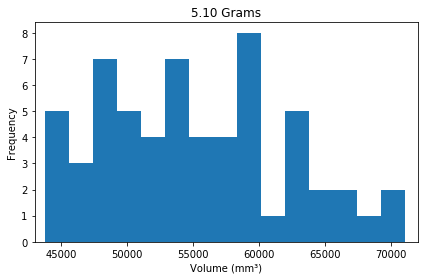

5.10 Grams sample is normally distributed: 0.128.


In [4]:
fig,ax = plt.subplots()
ax.hist(ante['Turtle Volume'], 15)
plt.xlim(43000,72000)
ax.set_title('5.10 Grams')
ax.set_ylabel('Frequency')
ax.set_xlabel('Volume (mm' + chr(0x00B3) + ')')
fig.tight_layout()
plt.show()

if shapiro(ante['Turtle Volume'])[1] >= 0.05:
    print('5.10 Grams sample is normally distributed: '+ str(shapiro(ante['Turtle Volume'])[1])[:5] + '.')
else:
    print('5.10 Grams sample is non-parametric: '+ str(shapiro(ante['Turtle Volume'])[1])[:5] + '.')

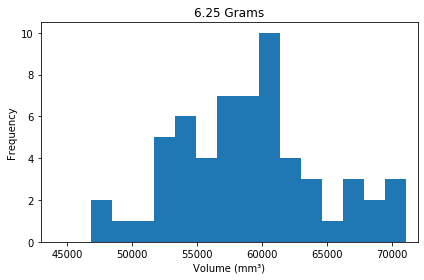

6.25 Grams sample is normally distributed: 0.352.


In [5]:
fig,ax = plt.subplots()
ax.hist(exante['Turtle Volume'], 15)
plt.xlim(43000,72000)
ax.set_title('6.25 Grams')
ax.set_ylabel('Frequency')
ax.set_xlabel('Volume (mm' + chr(0x00B3) + ')')
fig.tight_layout()
plt.show()

if shapiro(exante['Turtle Volume'])[1] < 0.05:
    print('6.25 Grams sample is non-parametric: '+ str(shapiro(exante['Turtle Volume'])[1])[:5 + '.'])
else:
    print('6.25 Grams sample is normally distributed: '+ str(shapiro(exante['Turtle Volume'])[1])[:5] + '.')

In [6]:
if levene(ante['Turtle Volume'],exante['Turtle Volume'])[1] < 0.05:
    print('The samples have unequal variances, per Levene: '+ str(levene(ante['Turtle Volume'],exante['Turtle Volume'])[1])[:5] + '.')
else:
    print('The samples have equal variances, per Levene: '+ str(levene(ante['Turtle Volume'],exante['Turtle Volume'])[1])[:5] + '.')
    
if bartlett(ante['Turtle Volume'],exante['Turtle Volume'])[1] < 0.05:
    print('The samples have unequal variances, per Bartlett: '+ str(bartlett(ante['Turtle Volume'],exante['Turtle Volume'])[1])[:5]+ '.')
else:
    print('The samples have equal variances, per Bartlett: '+ str(bartlett(ante['Turtle Volume'],exante['Turtle Volume'])[1])[:5] + '.')
    
if shapiro(ante['Turtle Volume'])[1] and shapiro(exante['Turtle Volume'])[1] < 0.05:
    print('Run with Levene, non-parametric.')
else:
    print('Run with Bartlett, normality.')  

The samples have unequal variances, per Levene: 0.026.
The samples have equal variances, per Bartlett: 0.089.
Run with Bartlett, normality.


<hr style="border:2px solid gray"> </hr>

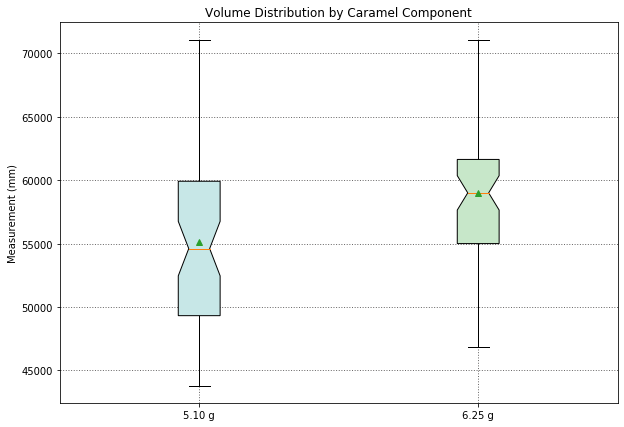

In [7]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Volume Distribution by Caramel Component')
box = ax.boxplot([ante['Turtle Volume'],exante['Turtle Volume']],
           labels=['5.10 g','6.25 g'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')
ax.grid(color='#6B6969',which='major',linestyle=':', linewidth=1)
colors = ['#C7E7E7','#C7E7C9']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

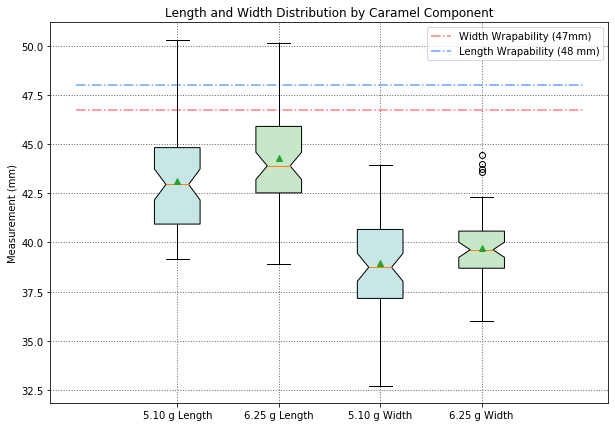

In [8]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Length and Width Distribution by Caramel Component')
box = ax.boxplot([ante['Turtle Length'],
                  exante['Turtle Length'],
                  ante['Turtle Width'],
                  exante['Turtle Width']],
           labels=['5.10 g Length',
                   '6.25 g Length',
                   '5.10 g Width',
                   '6.25 g Width'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')
plt.hlines(46.75,xmin=0,xmax=5,linestyles='dashdot',colors='#ff8080',label='Width Wrapability (47mm)')
plt.hlines(48,xmin=0,xmax=5,linestyles='dashdot',colors='#66a3ff',label='Length Wrapability (48 mm)')

ax.grid(color='#6B6969',which='major',linestyle=':', linewidth=1)
colors = ['#C7E7E7','#C7E7C9','#C7E7E7','#C7E7C9']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

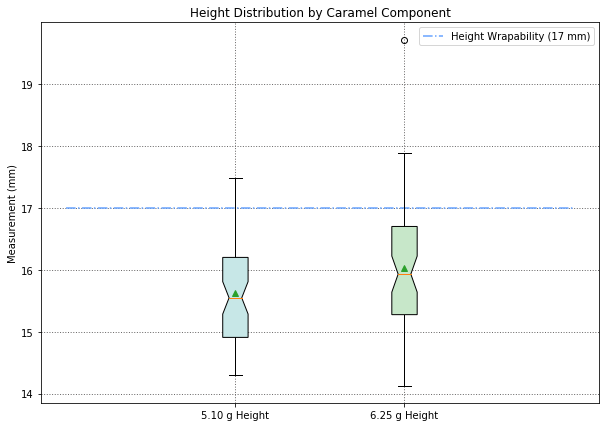

In [9]:
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Height Distribution by Caramel Component')
box = ax.boxplot([ante['Turtle Height'],
                  exante['Turtle Height']],
           labels=['5.10 g Height',
                   '6.25 g Height'],
           showmeans=True,
           notch=True,
           patch_artist=True)
ax.set_ylabel('Measurement (mm)')
ax.grid(color='#6B6969',which='major',linestyle=':', linewidth=1)
colors = ['#C7E7E7','#C7E7C9']
plt.hlines(17.0,xmin=0,xmax=3,linestyles='dashdot',colors='#66a3ff',label='Height Wrapability (17 mm)')

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.legend()
plt.show()

In [10]:
print('If we utilize more caramel, we are losing roughly '
      + str((1-norm(exante['Turtle Length'].mean(),exante['Turtle Length'].std()).cdf(48)) * 100)[:4] 
      + '% of our product due to length.')
print('If we utilize more caramel, we are losing roughly '
      + str((1-norm(exante['Turtle Height'].mean(),exante['Turtle Height'].std()).cdf(17)) * 100)[:4] 
      + '% of our product due to height.')

If we utilize more caramel, we are losing roughly 8.30% of our product due to length.
If we utilize more caramel, we are losing roughly 18.2% of our product due to height.


<hr style="border:2px solid gray"> </hr>

## Statistical Analysis

In [11]:
if ttest_ind(exante['Turtle Volume'],ante['Turtle Volume'])[1] < 0.025:
    print('The turtle volume 6.25 g component is, statistically, greater -- the p-value is: '
          + str(ttest_ind(exante['Turtle Volume'],ante['Turtle Volume'])[1])[:5] + '.')
else:
    print('The turtle volume 6.25 g component is, statistically, equal -- the p-value is: ' 
          + str(ttest_ind(exante['Turtle Volume'],ante['Turtle Volume'])[1])[:5] + '.')

The turtle volume 6.25 g component is, statistically, greater -- the p-value is: 0.001.


In [12]:
if ttest_ind(exante['Turtle Width'],ante['Turtle Width'])[1] < 0.025:
    print('The turtle width 6.25 g component is, statistically, greater -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Width'],ante['Turtle Width'])[1])[:5])
else:
    print('The turtle width 6.25 g component is, statistically, equal -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Width'],ante['Turtle Width'])[1])[:5])

The turtle width 6.25 g component is, statistically, equal -- the p-value is: 0.059


In [13]:
if ttest_ind(exante['Turtle Length'],ante['Turtle Length'])[1] < 0.025:
    print('The turtle length 6.25 g component is, statistically, greater -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Length'],ante['Turtle Length'])[1])[:5] + '.')
else:
    print('The turtle length 6.25 g component is, statistically, equal -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Length'],ante['Turtle Length'])[1])[:5] + '.')

The turtle length 6.25 g component is, statistically, greater -- the p-value is: 0.024.


In [14]:
if ttest_ind(exante['Turtle Height'],ante['Turtle Height'])[1] < 0.025:
    print('The turtle height 6.25 g component is, statistically, greater -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Height'],ante['Turtle Height'])[1])[:5] + '.')
else:
    print('The turtle height 6.25 g component is, statistically, equal -- the p-value is: ' + 
          str(ttest_ind(exante['Turtle Height'],ante['Turtle Height'])[1])[:5] + '.')

The turtle height 6.25 g component is, statistically, greater -- the p-value is: 0.022.
